<a href="https://colab.research.google.com/github/sridevi0224/Task1/blob/main/task2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install OpenCV if needed
!pip install opencv-python-headless

# Step 2: Upload your video
from google.colab import files
uploaded = files.upload()

# Step 3: Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 4: Load the uploaded video
video_path = next(iter(uploaded))
cap = cv2.VideoCapture(video_path)

# Step 5: Read the first frame
ret, frame = cap.read()
if not ret:
    print("❌ Failed to read video.")
    cap.release()
else:
    print("✅ Video loaded.")

# Step 6: Select ROI manually from the first frame
# Skip manual ROI in Colab and define fixed ROI (x, y, w, h)
# You can adjust these values after seeing the video frame
roi = frame[100:200, 150:250]
track_window = (150, 100, 100, 100)  # x, y, w, h

# Step 7: Convert ROI to HSV and compute histogram
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Step 8: Setup termination criteria and frame collector
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
frames = []

# Step 9: Tracking loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)

    ret_camshift, track_window = cv2.CamShift(dst, track_window, term_crit)


Saving mall.mp4 to mall (3).mp4
✅ Video loaded.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8974 - loss: 0.3302 - val_accuracy: 0.9833 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9866 - loss: 0.0454 - val_accuracy: 0.9892 - val_loss: 0.0342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9899 - val_loss: 0.0302
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9897 - val_loss: 0.0293
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9907 - val_loss: 0.0284
313/313 - 2s - 7ms/step - accuracy: 0.9907 - loss: 0.0284

Test accuracy: 0.9907


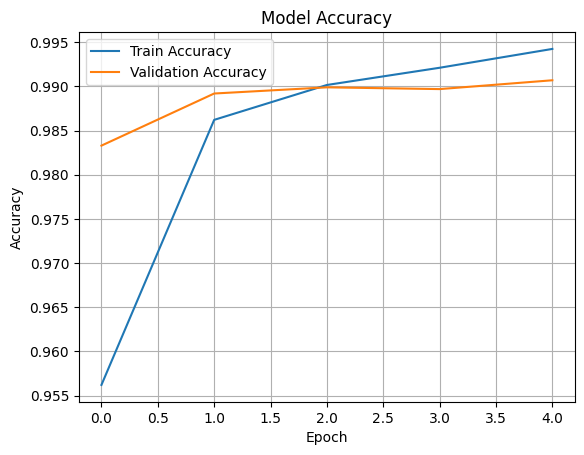

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()